In [1]:
import pandas as pd
pumpinks = pd.read_csv("C:/Users/pc/Desktop/Data Science &  Machine Learning/ML-For-Beginners/2-Regression/data/US-pumpkins.csv")

pumpinks = pumpinks[pumpinks["Package"].str.contains("bushel",case=True,regex=True)]
pumpinks.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpinks.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
new_columns = ["Package", "Month", "Low Price", "High Price", "Date"]

pumpinks = pumpinks.drop([c for c in pumpinks.columns if c not in new_columns], axis=1)


In [4]:
price = (pumpinks["Low Price"] + pumpinks["High Price"])/2

month = pd.DatetimeIndex(pumpinks["Date"]).month

new_pumpkins = pd.DataFrame({"Month" : month, "Package" : pumpinks["Package"], "Low Price" : pumpinks["Low Price"], "High Price" : pumpinks["High Price"], "Price" : price})

In [5]:
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1 1/9"), "Price"] = price/(1+1/9)

new_pumpkins.loc[new_pumpkins["Package"].str.contains("1/2"), "Price"] = price/(1/2)



In [6]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [7]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


<function matplotlib.pyplot.show(close=None, block=None)>

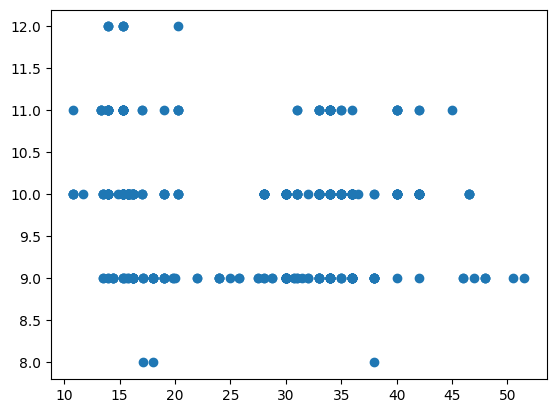

In [8]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price,month)
plt.show

Text(0, 0.5, 'Pumpkin Price')

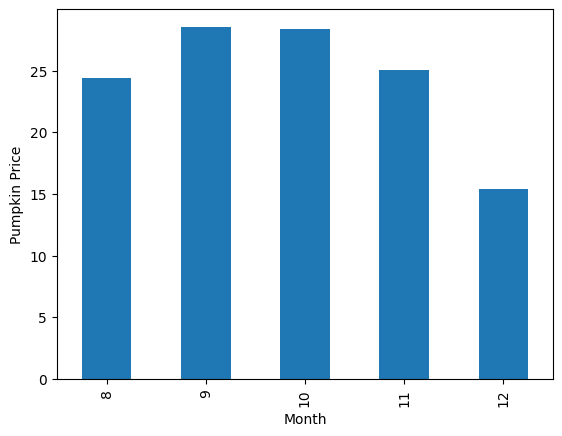

In [9]:
new_pumpkins.groupby(["Month"])["Price"].mean().plot(kind="bar")

plt.ylabel("Pumpkin Price")


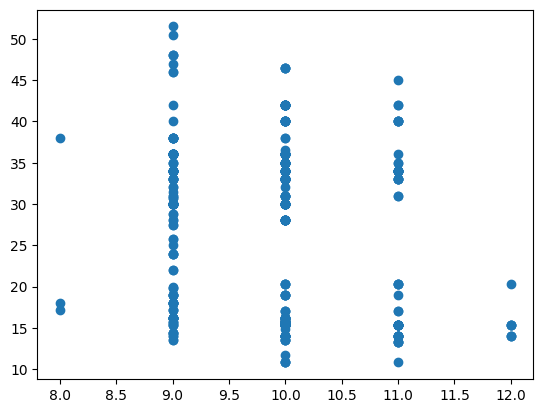

In [10]:
plt.scatter(new_pumpkins["Month"], new_pumpkins["Price"])

In [19]:
from datetime import datetime
day_of_year = pd.to_datetime(pumpinks['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
day_of_year

C:\Users\pc\AppData\Local\Temp\ipykernel_27696\3370938280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpinks['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


70      267
71      267
72      274
73      274
74      281
       ... 
1738    273
1739    273
1740    273
1741    273
1742    273
Name: Date, Length: 415, dtype: int64